In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

marks = pd.read_csv('stud_math.csv')

In [2]:
display(marks.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [4]:
def nan_to_median(num_col): # добавляем функцию для заполнения пустых значений в числовых столбцах медианными значениями
    median = num_col.median(skipna = True)
    return num_col.fillna(median, inplace=True)

def nan_to_mode(obj_col): # добавляем функцию для заполнения пустых значений в строковых столбцах значениями моды
    mode = obj_col.mode()
    return obj_col.fillna(mode[0], inplace=True)

Рассмотрим каждый столбец по отдельности

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
school    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


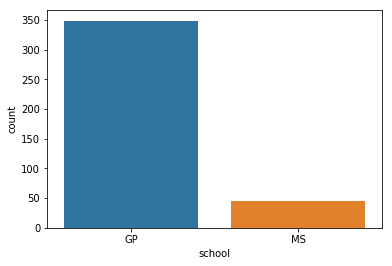

In [5]:
display(pd.DataFrame(marks.school.value_counts()))
marks.loc[:, ['school']].info()
sns.countplot(marks.school)

Столбец school не имеет статистического значения. Будет удален из выборки

In [6]:
marks.drop(['school'], inplace = True, axis = 1)

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
sex    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


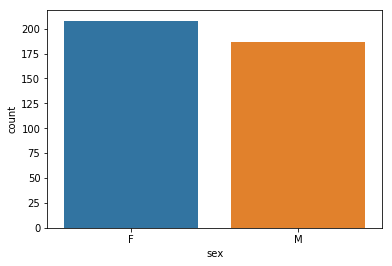

In [7]:
display(pd.DataFrame(marks.sex.value_counts()))
marks.loc[:, ['sex']].info()
sns.countplot(marks.sex)

Как видно по графику, количество женщин в исследованиях незначительно выше, чем мужчин

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
age    395 non-null int64
dtypes: int64(1)
memory usage: 3.2 KB


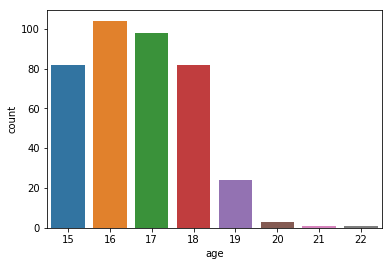

In [8]:
display(pd.DataFrame(marks.age.value_counts()))
marks.loc[:, ['age']].info()
sns.countplot(marks.age)

Основная часть исследуемых учащихся в возрасте от 15 до 19 лет 

,address
U,312
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
address    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


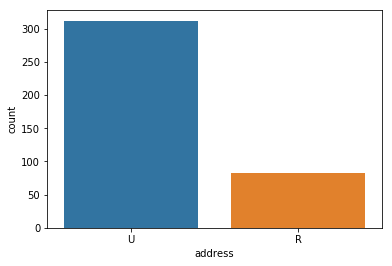

In [9]:
nan_to_mode(marks.address) # заполняем пропуски
display(pd.DataFrame(marks.address.value_counts()))
marks.loc[:, ['address']].info()
sns.countplot(marks.address)

Основная часть учащихся живут в городе

,famsize
GT3,288
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsize    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


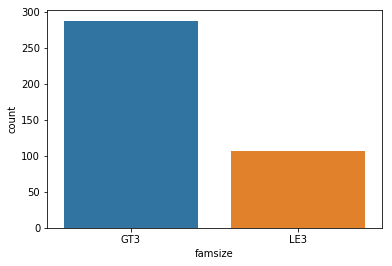

In [10]:
nan_to_mode(marks.famsize) # заполняем пропуски
display(pd.DataFrame(marks.famsize.value_counts()))
marks.loc[:, ['famsize']].info()
sns.countplot(marks.famsize)

,Pstatus
T,359
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Pstatus    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


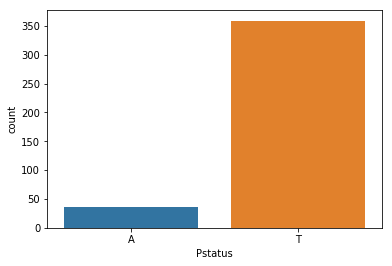

In [11]:
nan_to_mode(marks.Pstatus)
display(pd.DataFrame(marks.Pstatus.value_counts()))
marks.loc[:, ['Pstatus']].info()
sns.countplot(marks.Pstatus)

Практически все учащиеся живут в полной семье

,Medu
4.0,131
2.0,102
3.0,100
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Medu    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


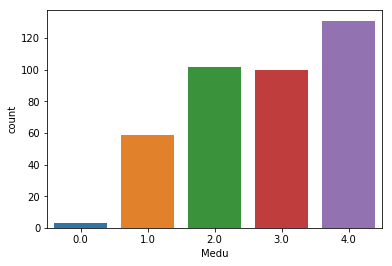

In [12]:
nan_to_median(marks.Medu)
display(pd.DataFrame(marks.Medu.value_counts()))
marks.loc[:, ['Medu']].info()
sns.countplot(marks.Medu)

In [13]:
nan_to_median(marks.Fedu)
pd.DataFrame(marks['Fedu'].value_counts())

,Fedu
2.0,130
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Значение 40 явная ошибка (диапазон значений от 0 до 4). По здравому смыслу, вероятнее всего это 4. Меняем его в датасете 

In [14]:
marks.Fedu= marks.Fedu.replace(40,4)

,Fedu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fedu    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


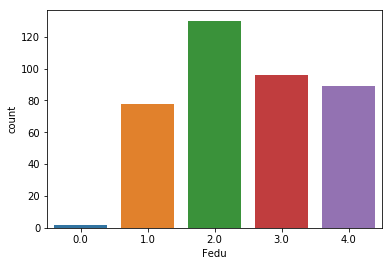

In [15]:
nan_to_median(marks.Fedu)
display(pd.DataFrame(marks.Fedu.value_counts()))
marks.loc[:, ['Fedu']].info()
sns.countplot(marks.Fedu)

,Mjob
other,152
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Mjob    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


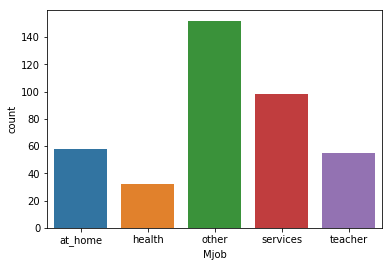

In [16]:
nan_to_mode(marks.Mjob)
display(pd.DataFrame(marks['Mjob'].value_counts()))
marks.loc[:, ['Mjob']].info()
sns.countplot(marks.Mjob)

,Fjob
other,233
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fjob    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


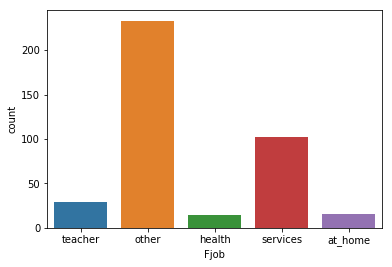

In [17]:
nan_to_mode(marks.Fjob)
display(pd.DataFrame(marks['Fjob'].value_counts()))
marks.loc[:, ['Fjob']].info()
sns.countplot(marks.Fjob)

,reason
course,154
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
reason    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


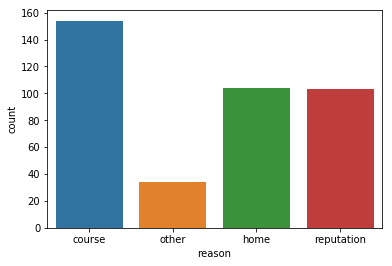

In [18]:
nan_to_mode(marks.reason)
display(pd.DataFrame(marks['reason'].value_counts()))
marks.loc[:, ['reason']].info()
sns.countplot(marks.reason)

,guardian
mother,281
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
guardian    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


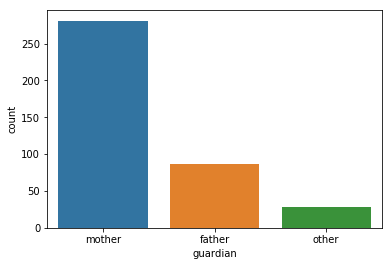

In [19]:
nan_to_mode(marks.guardian)
display(pd.DataFrame(marks['guardian'].value_counts()))
marks.loc[:, ['guardian']].info()
sns.countplot(marks.guardian)

,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
traveltime    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


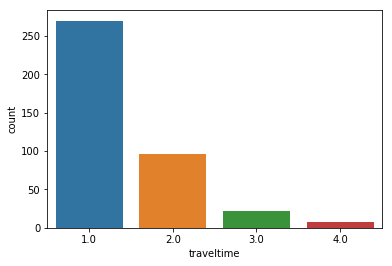

In [20]:
nan_to_median(marks.traveltime)
display(pd.DataFrame(marks['traveltime'].value_counts()))
marks.loc[:, ['traveltime']].info()
sns.countplot(marks.traveltime)

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


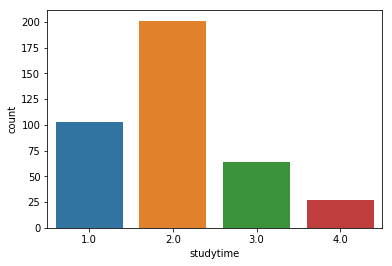

In [21]:
nan_to_median(marks.studytime)
display(pd.DataFrame(marks['studytime'].value_counts()))
marks.loc[:, ['studytime']].info()
sns.countplot(marks.studytime)

,failures
0.0,315
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
failures    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


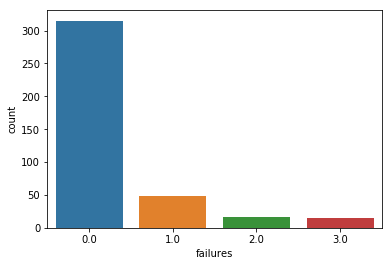

In [22]:
nan_to_median(marks.failures)
display(pd.DataFrame(marks['failures'].value_counts()))
marks.loc[:, ['failures']].info()
sns.countplot(marks.failures)

,schoolsup
no,344
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
schoolsup    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


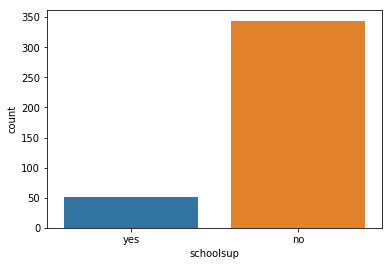

In [23]:
nan_to_mode(marks.schoolsup)
display(pd.DataFrame(marks['schoolsup'].value_counts()))
marks.loc[:, ['schoolsup']].info()
sns.countplot(marks.schoolsup)

,famsup
yes,258
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsup    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


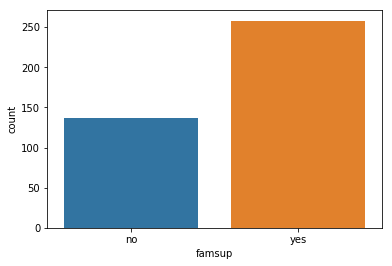

In [24]:
nan_to_mode(marks.famsup)
display(pd.DataFrame(marks['famsup'].value_counts()))
marks.loc[:, ['famsup']].info()
sns.countplot(marks.famsup)

,paid
no,240
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
paid    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


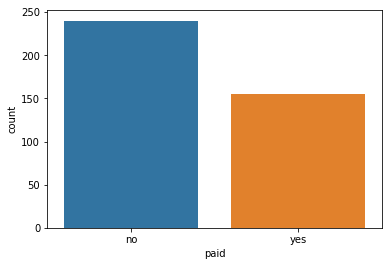

In [25]:
nan_to_mode(marks.paid)
display(pd.DataFrame(marks['paid'].value_counts()))
marks.loc[:, ['paid']].info()
sns.countplot(marks.paid)

,activities
yes,209
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
activities    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


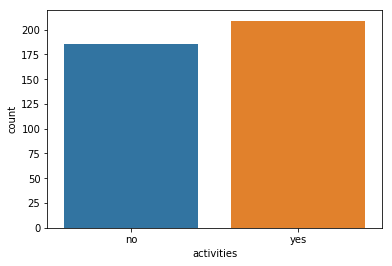

In [26]:
nan_to_mode(marks.activities)
display(pd.DataFrame(marks['activities'].value_counts()))
marks.loc[:, ['activities']].info()
sns.countplot(marks.activities)

,nursery
yes,316
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
nursery    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


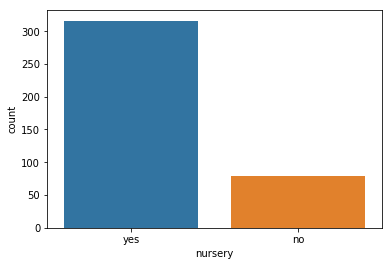

In [27]:
nan_to_mode(marks.nursery)
display(pd.DataFrame(marks['nursery'].value_counts()))
marks.loc[:, ['nursery']].info()
sns.countplot(marks.nursery)

Столбец studytime, granular не имеет смыслового значения. Будет удален из выборки

In [28]:
marks.drop(['studytime, granular'], inplace = True, axis = 1)

,higher
yes,376
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
higher    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


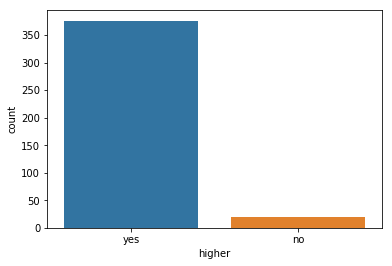

In [29]:
nan_to_mode(marks.higher)
display(pd.DataFrame(marks['higher'].value_counts()))
marks.loc[:, ['higher']].info()
sns.countplot(marks.higher)

Практически все учащиеся в выборке хотят получить высшее образование.

,internet
yes,339
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
internet    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


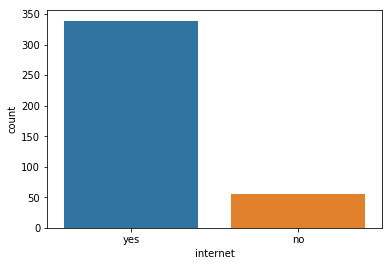

In [30]:
nan_to_mode(marks.internet)
display(pd.DataFrame(marks['internet'].value_counts()))
marks.loc[:, ['internet']].info()
sns.countplot(marks.internet)

,romantic
no,271
yes,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
romantic    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


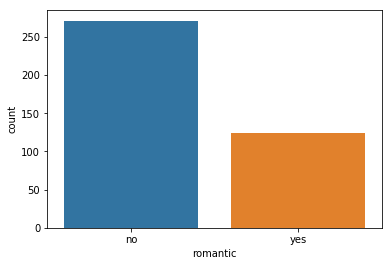

In [31]:
nan_to_mode(marks.romantic)
display(pd.DataFrame(marks['romantic'].value_counts()))
marks.loc[:, ['romantic']].info()
sns.countplot(marks.romantic)

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famrel    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


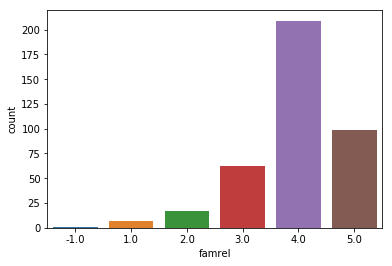

In [32]:
nan_to_median(marks.famrel)
display(pd.DataFrame(marks['famrel'].value_counts()))
marks.loc[:, ['famrel']].info()
sns.countplot(marks.famrel)

Значение -1 это явная ошибка данных. Заменим его на 1

In [33]:
marks.famrel = marks.famrel.replace(-1,1)

,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
freetime    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


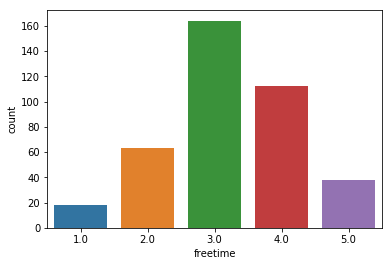

In [34]:
nan_to_median(marks.freetime)
display(pd.DataFrame(marks['freetime'].value_counts()))
marks.loc[:, ['freetime']].info()
sns.countplot(marks.freetime)

,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
goout    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


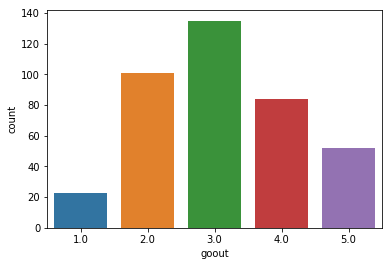

In [35]:
nan_to_median(marks.goout)
display(pd.DataFrame(marks['goout'].value_counts()))
marks.loc[:, ['goout']].info()
sns.countplot(marks.goout)

,health
5.0,138
3.0,89
4.0,78
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
health    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


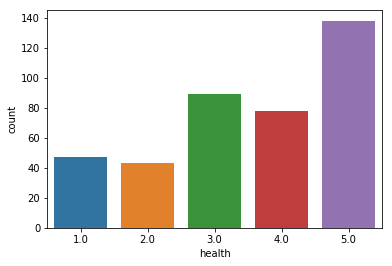

In [36]:
nan_to_median(marks.health)
display(pd.DataFrame(marks['health'].value_counts()))
marks.loc[:, ['health']].info()
sns.countplot(marks.health)

In [37]:
nan_to_median(marks.absences)
display(pd.DataFrame(marks['absences'].value_counts()))
marks.loc[:, ['absences']].info()

,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
absences    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

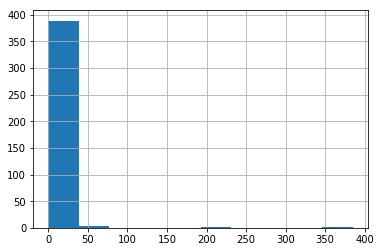

In [38]:
marks.absences.hist()
marks.absences.describe()

Как видно по графику, основной диапазон значений находится в пределах до 50. Данные содержат выбросы. Избавимся от них.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


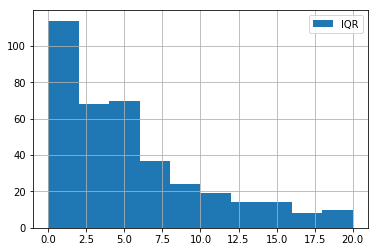

In [39]:
IQR = marks.absences.quantile(0.75) - marks.absences.quantile(0.25)
perc25 = marks.absences.quantile(0.25)
perc75 = marks.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
marks.absences.loc[marks.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 20), label = 'IQR')
 
plt.legend();

In [40]:
marks = marks.loc[marks.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [41]:
nan_to_median(marks.score)
display(pd.DataFrame(marks['score'].value_counts()))
marks.loc[:, ['score']].info()

,score
50.0,54
55.0,48
0.0,37
75.0,33
60.0,31
65.0,30
40.0,28
70.0,27
45.0,23
80.0,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 394
Data columns (total 1 columns):
score    378 non-null float64
dtypes: float64(1)
memory usage: 5.9 KB


count    378.000000
mean      52.275132
std       22.890779
min        0.000000
25%       41.250000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

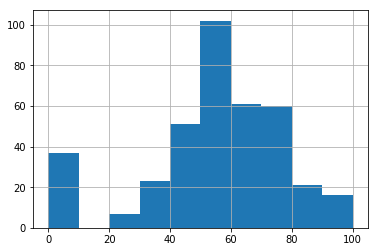

In [42]:
marks.score.hist()
marks.score.describe()

Основной столбец score как видно на гистограмме имеет выброс. Это значение 0. Учащиеся либо не сдали экзамен, либо не явились на него. Основной диапазон значений от 20. Удалим выброс

25-й перцентиль: 41.25, 75-й перцентиль: 70.0, IQR: 28.75,  Границы выбросов: [-1.875, 113.125].


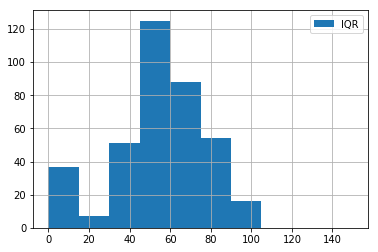

In [43]:
IQR = marks.score.quantile(0.75) - marks.score.quantile(0.25)
perc25 = marks.score.quantile(0.25)
perc75 = marks.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, "
      .format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
marks.score.loc[marks.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 150), label = 'IQR')
 
plt.legend();

In [44]:
marks = marks.loc[marks.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

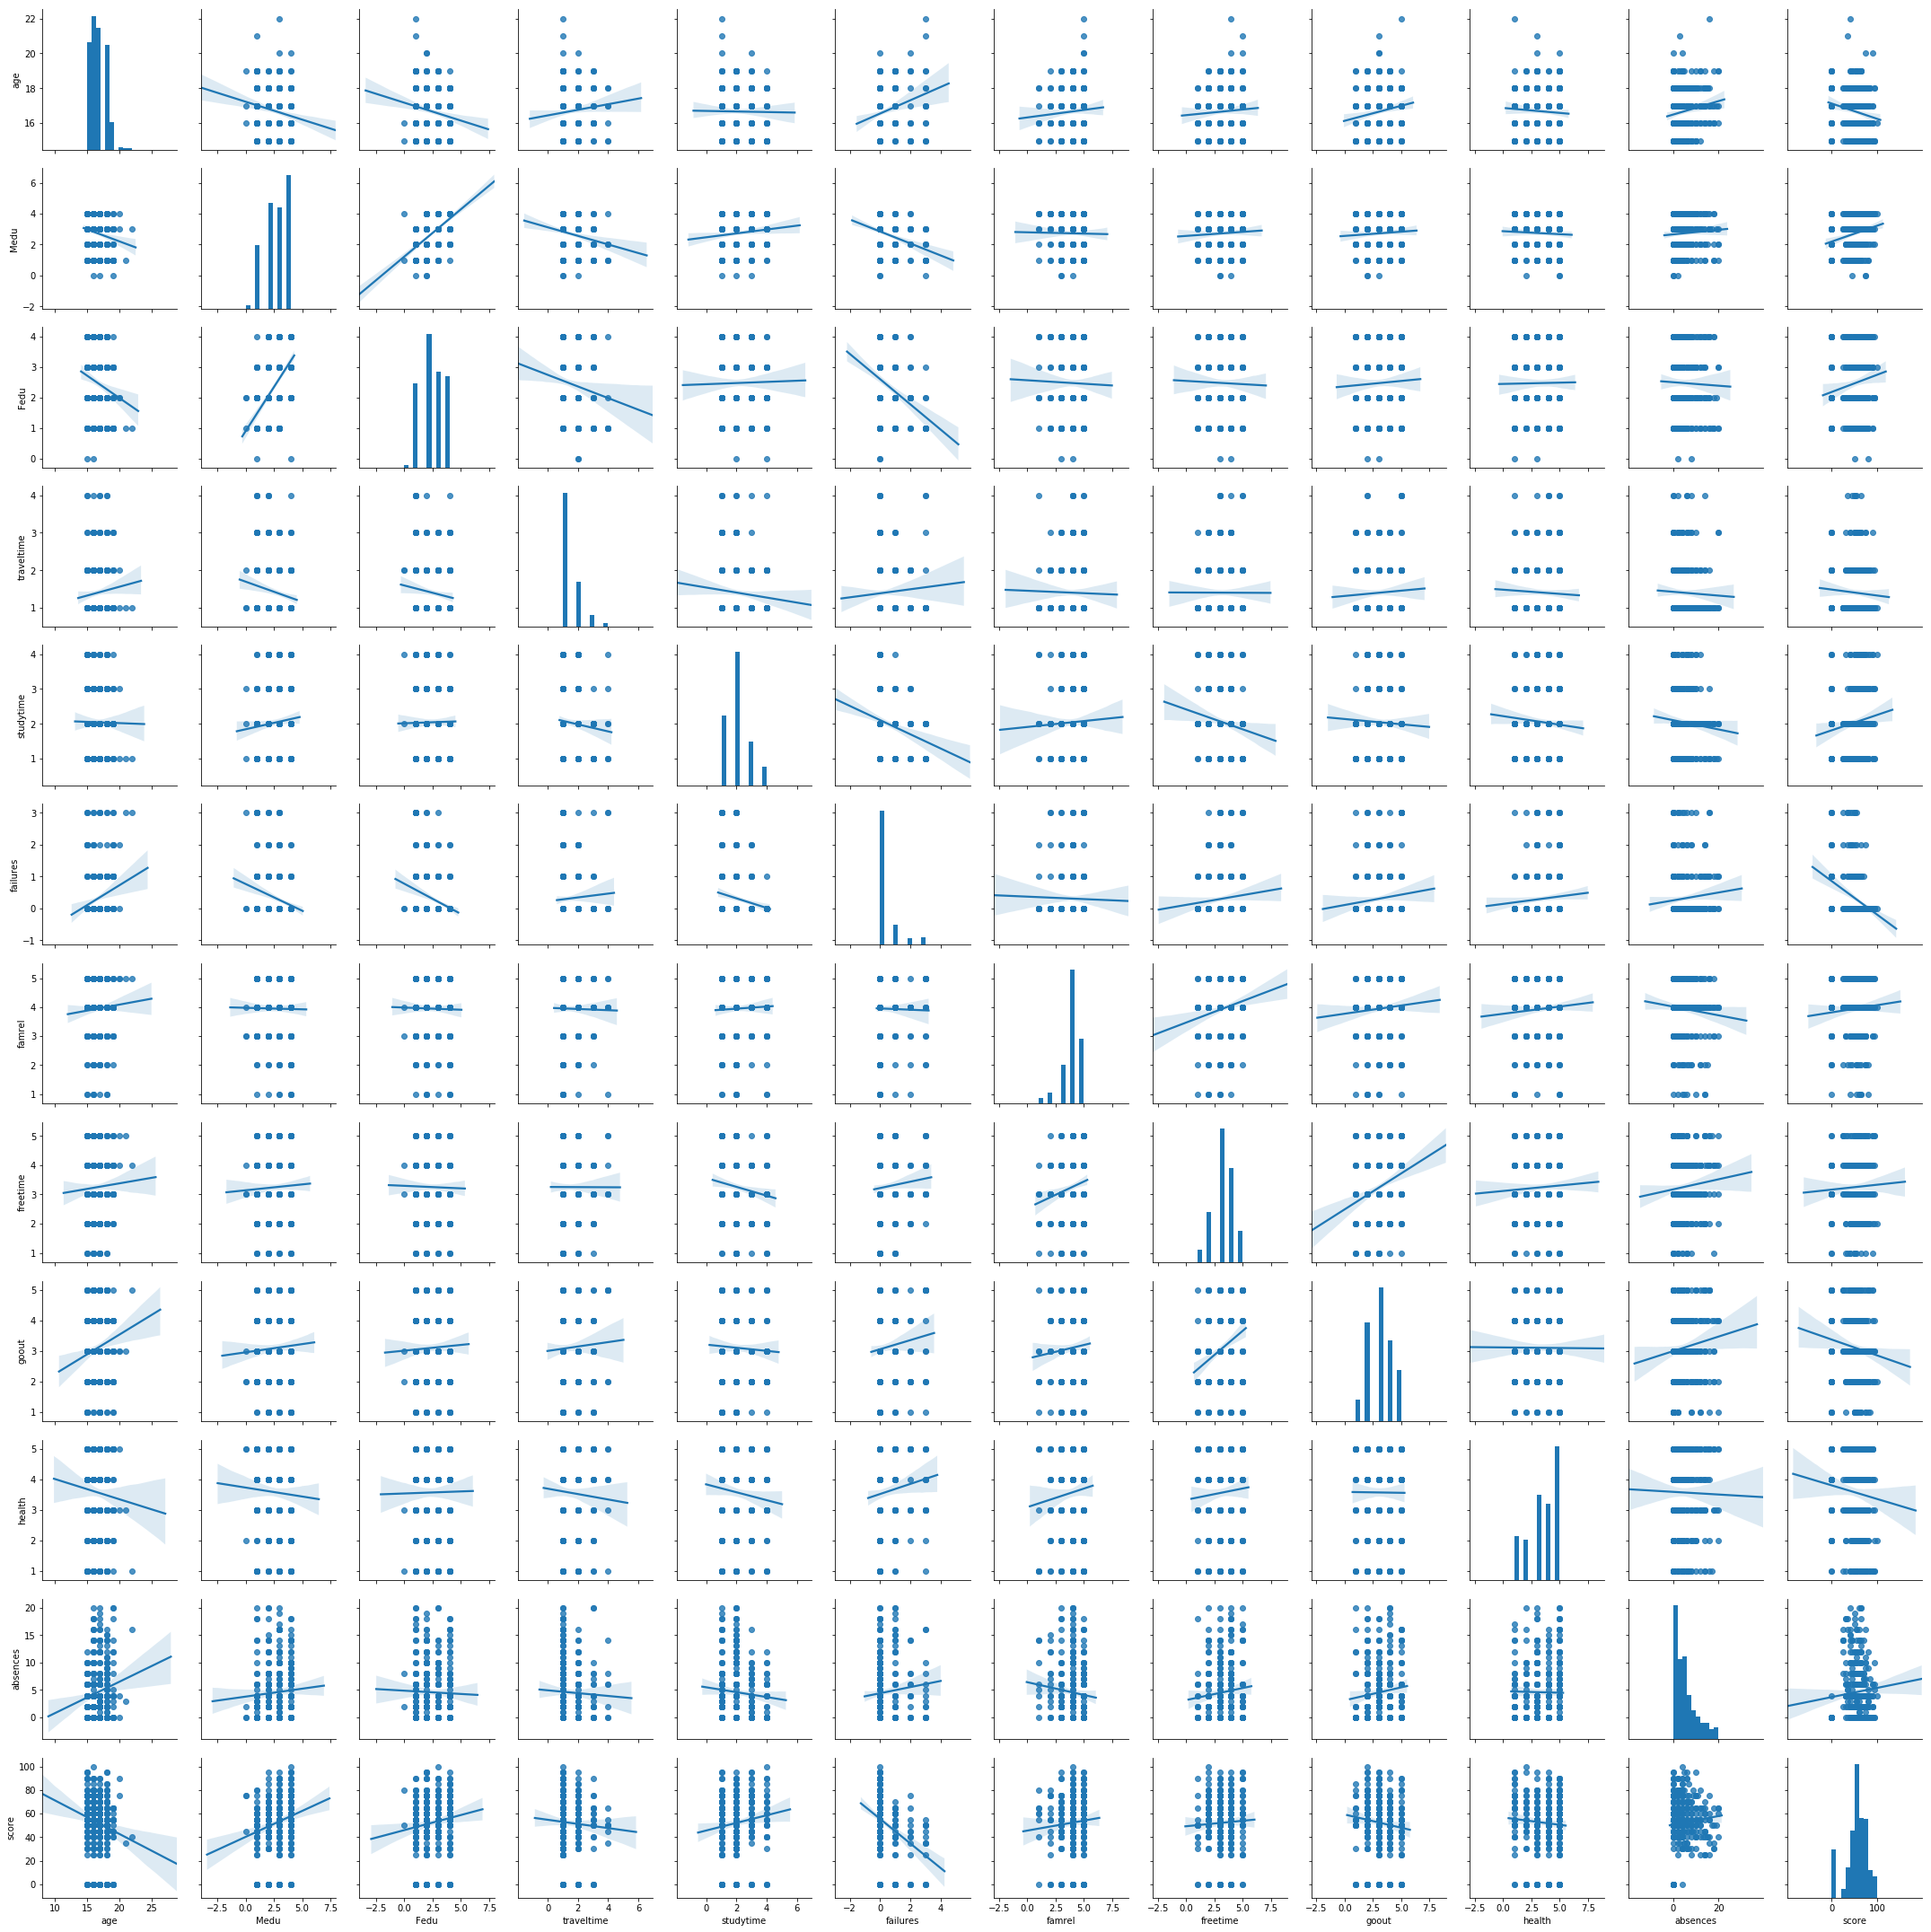

In [45]:
sns.pairplot(marks,  kind = 'reg') # построим графики зависимостей

In [46]:
marks.corr() # выодим матрицу корреляций

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.178544,-0.173245,0.086832,-0.010651,0.217280,0.059692,0.049611,0.149460,-0.061529,0.148437,-0.157974
Medu,-0.178544,1.000000,0.594081,-0.172479,0.095697,-0.254319,-0.013216,0.045712,0.054035,-0.047271,0.065026,0.212342
Fedu,-0.173245,0.594081,1.000000,-0.121623,0.014803,-0.279051,-0.018591,-0.019159,0.036661,0.010513,-0.026101,0.119849
traveltime,0.086832,-0.172479,-0.121623,1.000000,-0.082046,0.056727,-0.016415,-0.001809,0.045091,-0.044274,-0.035997,-0.052938
studytime,-0.010651,0.095697,0.014803,-0.082046,1.000000,-0.174359,0.035224,-0.130854,-0.039465,-0.079743,-0.076534,0.119012
failures,0.217280,-0.254319,-0.279051,0.056727,-0.174359,1.000000,-0.018472,0.081508,0.098403,0.087649,0.082667,-0.329721
famrel,0.059692,-0.013216,-0.018591,-0.016415,0.035224,-0.018472,1.000000,0.164375,0.071360,0.078062,-0.083344,0.064961
freetime,0.049611,0.045712,-0.019159,-0.001809,-0.130854,0.081508,0.164375,1.000000,0.279047,0.052624,0.086623,0.039375
goout,0.149460,0.054035,0.036661,0.045091,-0.039465,0.098403,0.071360,0.279047,1.000000,-0.004674,0.105943,-0.108130
health,-0.061529,-0.047271,0.010513,-0.044274,-0.079743,0.087649,0.078062,0.052624,-0.004674,1.000000,-0.015549,-0.074418


Как видно из матрицы, наиболее скоррелированными показателями для score являются Medu,Fedu,studytime,famrel,freetime,absences. Можно исключить показатель goout, так как он напрямую связан с freetime. health,traveltime,agе,failures - статистически незначимы

In [47]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y='score', 
                data=marks.loc[marks.loc[:, column].isin(marks.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

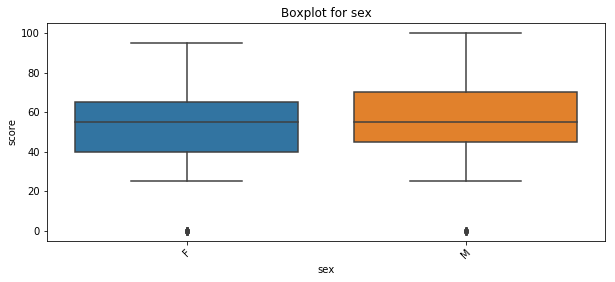

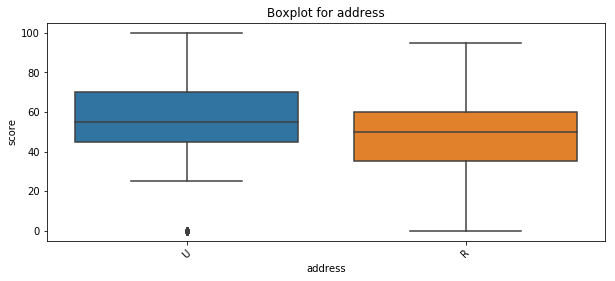

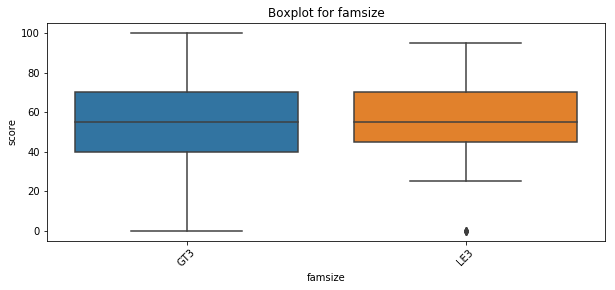

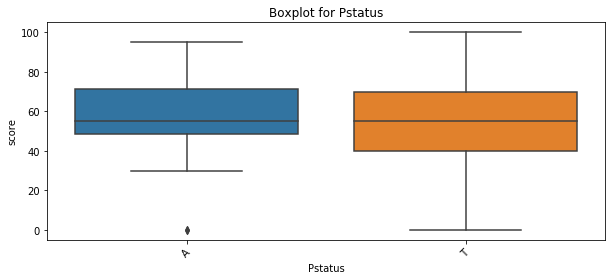

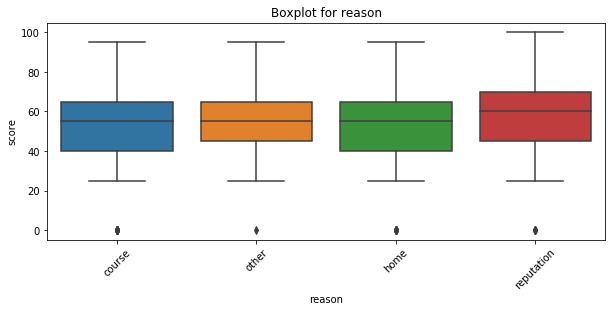

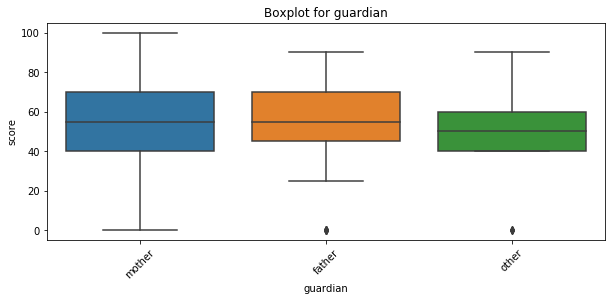

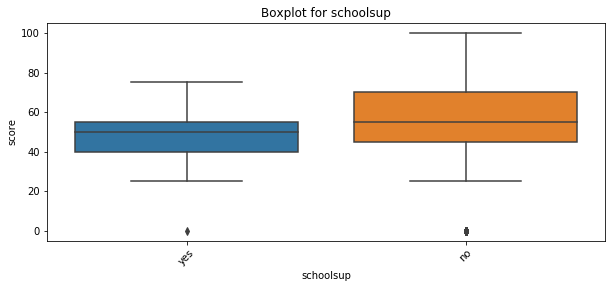

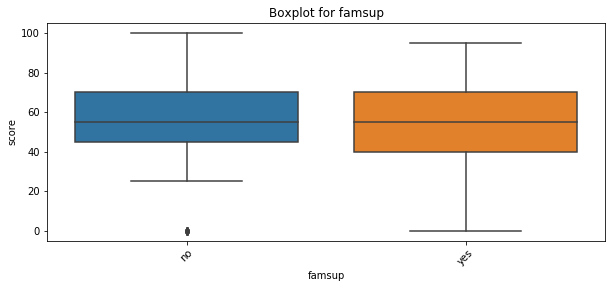

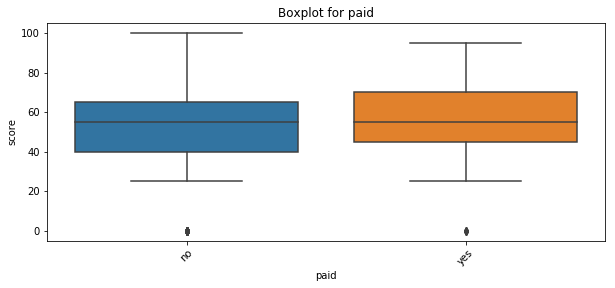

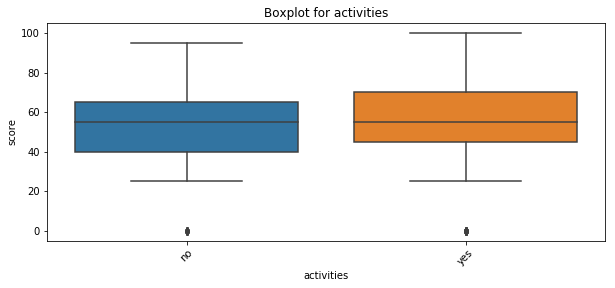

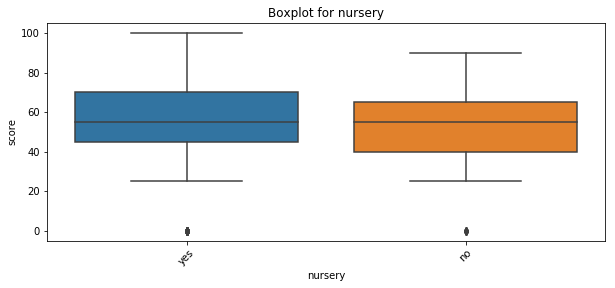

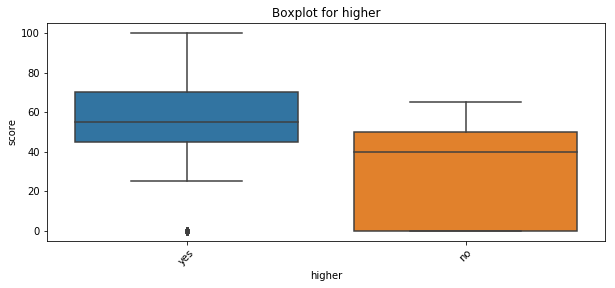

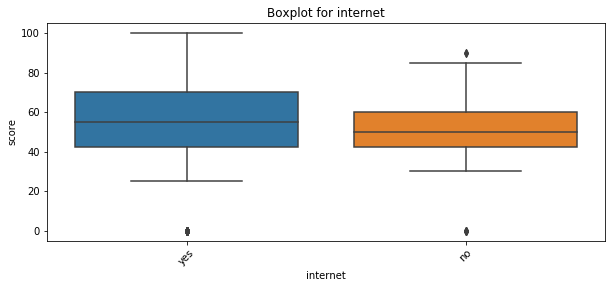

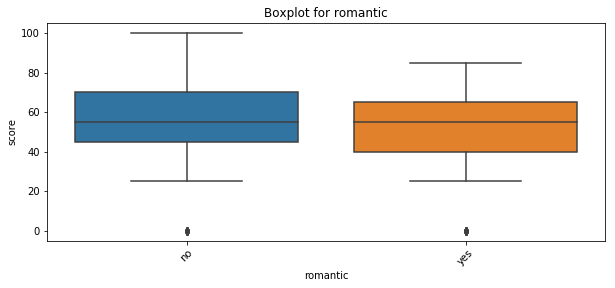

In [48]:
for col in ['sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Анализ номинативных переменных

In [49]:
def get_stat_dif(column):
    cols = marks.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(marks.loc[marks.loc[:, column] == comb[0], 'score'], 
                        marks.loc[marks.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [50]:
for col in ['sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Серьёзно отличаются два параметра: sex, address, paid, higher, romantic. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: 'sex','address', 'paid', 'higher', 'romantic', 'Medu', 'Fedu', 'studytime', 'famrel', 'freetime', 'absences'.

In [51]:
marks_for_model = marks.loc[:, ['sex','address', 'paid', 'higher', 'romantic', 'Medu', 'Fedu', 'studytime', 'famrel', 'freetime', 'absences']]
marks_for_model.head()

,sex,address,paid,higher,romantic,Medu,Fedu,studytime,famrel,freetime,absences
0,F,U,no,yes,no,4.0,4.0,2.0,4.0,3.0,6.0
1,F,U,no,yes,no,1.0,1.0,2.0,5.0,3.0,4.0
2,F,U,no,yes,no,1.0,1.0,2.0,4.0,3.0,10.0
3,F,U,yes,yes,yes,4.0,2.0,3.0,3.0,2.0,2.0
4,F,U,yes,yes,no,3.0,3.0,2.0,4.0,3.0,4.0


Итак, в результате EDA для анализа влияния параметров условий жизни учащихся на успеваемость по математике были получены следующие выводы:

1. В данных достаточно мало пустых значений.
2. Выбросы найдены только в столбцах с оценками и пропусками. Две незначительные ошибки найдены в столбцах Fedu и famrel, были поизведены замены. Это позволяет сделать вывод о том, что данные достаточно чистые.
3. Положительная корреляция параметров хорошие взаимоотношения в семье, а также отсутсвтие пропусков и близость к школе с оценками позволяют предположить, что благополучие в семье, территориальная доступность к школе положительно сказывается на успеваемости учащихся.
4. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'sex','address', 'paid', 'higher', 'romantic', 'Medu', 'Fedu', 'studytime', 'famrel', 'freetime', 'absences'.